In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [4]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)


In [5]:
img_dir = os.path.join(os.getcwd(), "/Users/ruchitha/Desktop/DataMining_Projects/DataMining_Assignment-3/images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [6]:
X = pd.DataFrame([im.histogram() for im in images])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,255,38,40,37,49,35,54,55,79,68,...,18,7,7,4,7,10,4,6,3,58
1,3,0,3,4,3,3,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,4,5,8,19,16,11,...,13,9,12,9,15,17,12,24,11,46
4,0,0,0,0,0,0,0,2,0,3,...,8,5,13,10,7,11,18,16,15,50


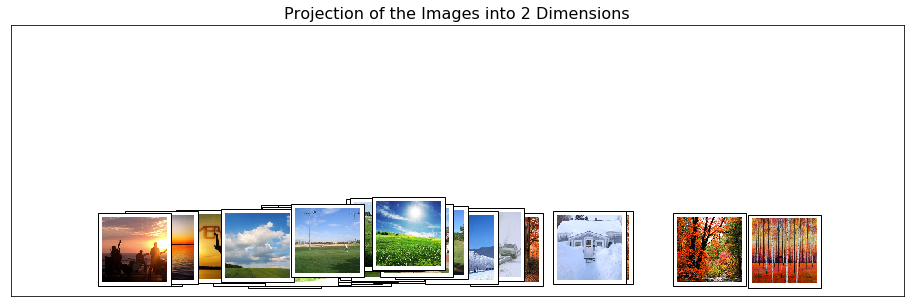

In [7]:
plot_image_space(images, X)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
y = pca.fit_transform(X)


In [9]:
y

array([[ 1349.34912305,   110.69138118],
       [ 2016.38647643,   715.46536192],
       [  350.57404826,  -278.82447404],
       [  139.17175624,  -522.85158231],
       [  662.736693  ,  -325.91222517],
       [ 1379.40340061,   314.6784459 ],
       [  637.51066207,   168.26862002],
       [  132.08723102,  -629.61288979],
       [  437.25318886,  -195.44745068],
       [  123.66331548,  -546.033685  ],
       [-1209.10000265,   836.10657213],
       [ -619.06013208,  1379.85576539],
       [ -937.99241306,   -32.468519  ],
       [ -695.00649038,  -181.70554874],
       [ -757.77794449,   110.68776476],
       [ -939.1562577 ,  1249.72598052],
       [ -206.46746429,    43.41487365],
       [ -757.81929883,   174.0964315 ],
       [ -788.30838217,    28.4236201 ],
       [ -677.12815643,   103.20491854],
       [  445.32122144,   121.56006384],
       [ -212.74046472,  -144.69120659],
       [  283.78778594,    38.59156645],
       [  923.18945639,   433.19803285],
       [  768.51

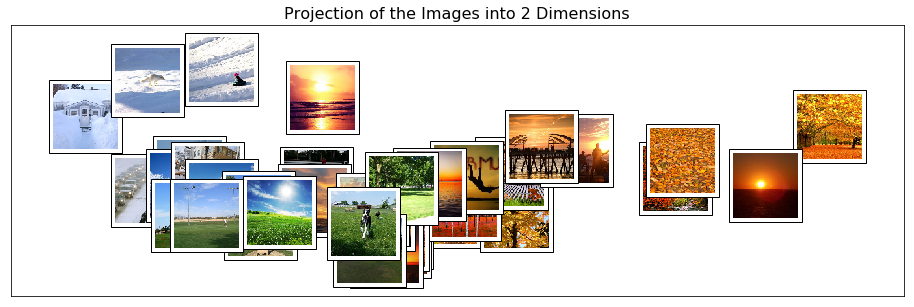

In [10]:
plot_image_space(images, y)

In [25]:
img_dir1 = os.path.join(os.getcwd(), "/Users/ruchitha/Desktop/DataMining_Projects/DataMining_Assignment-3/ani") # directory path
img_dir1


'/Users/ruchitha/Desktop/DataMining_Projects/DataMining_Assignment-3/ani'

In [26]:
images1 = load_images(img_dir1) # load images in the specified directory


In [27]:
X1 = pd.DataFrame([im.histogram() for im in images1])


In [30]:
X1.head()
pca1 = PCA(n_components=2)
y1 = pca1.fit_transform(X1)

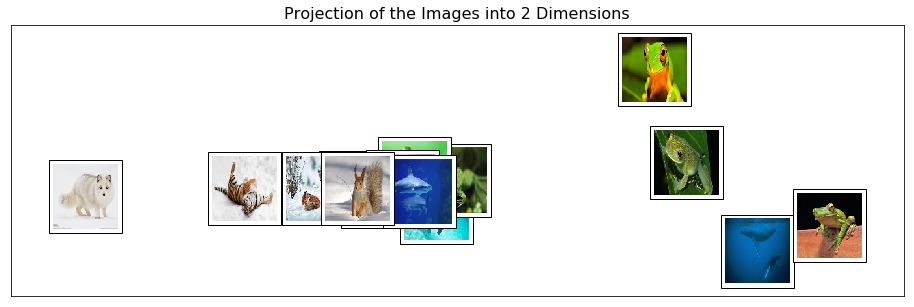

In [31]:
plot_image_space(images1, y1)